In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing

# Load the cleaned dataset
df = pd.read_csv("OnlineRetail.csv")

# Check the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [2]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Double-check that TotalAmount is correct
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Basic data check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536641 entries, 0 to 536640
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
 8   TotalAmount  536641 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 36.8+ MB


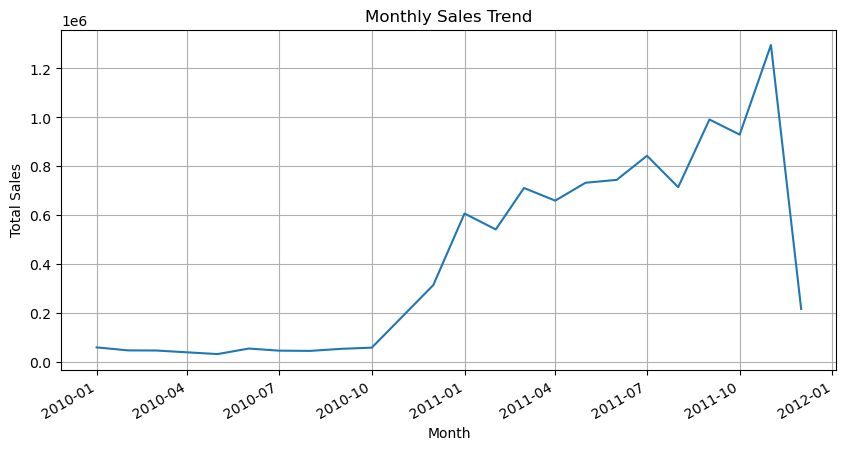

In [3]:
# Add a 'Month' column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Group by Month and sum the sales
monthly_sales = df.groupby('Month')['TotalAmount'].sum()

# Convert Period to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot sales trend
plt.figure(figsize=(10, 5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
E:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


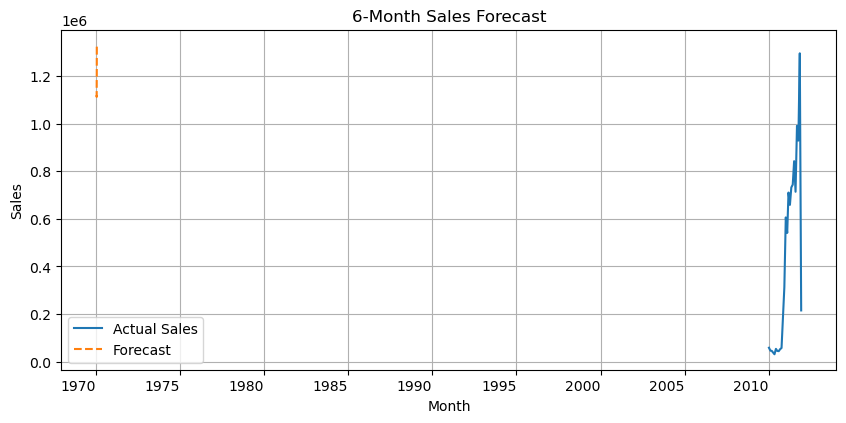

In [5]:
# Use Holt-Winters Exponential Smoothing for forecasting
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=4)
fit = model.fit()

# Forecast next 6 months
forecast = fit.forecast(6)

# Plot actual + forecast
plt.figure(figsize=(10, 5))
monthly_sales.plot(label="Actual Sales")
forecast.plot(label="Forecast", linestyle="--")
plt.title("6-Month Sales Forecast")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Top 5 countries by revenue
top_countries = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(5)
print(top_countries)

# Top 5 products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)
print(top_products)


Country
United Kingdom    8167128.184
Netherlands        284661.540
EIRE               262993.380
Germany            221509.470
France             197317.110
Name: TotalAmount, dtype: float64
Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53751
JUMBO BAG RED RETROSPOT              47260
POPCORN HOLDER                       36322
ASSORTED COLOUR BIRD ORNAMENT        36282
PACK OF 72 RETROSPOT CAKE CASES      36016
Name: Quantity, dtype: int64
